<a href="https://colab.research.google.com/github/chien2734/sgu_data_analyst/blob/chien/Lab2_DataAnalytics/DataAnalystExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Data Analysis Example**

## 4. USDA Food Database

### Thông tin về dữ liệu
* USDA Food Database là cơ sở dữ liệu về thông tin dinh dưỡng của thực phẩm do Bộ Nông nghiệp Hoa Kỳ (USDA) cung cấp.
* Cơ sở dữ liệu này chứa thông tin chi tiết về các loại thực phẩm, bao gồm:
  * lượng calo
  * protein
  * chất béo
  * carbohydrate
  * vitamin
  * khoáng chất và các thành phần dinh dưỡng khác.

### Cấu trúc dữ liệu của một món ăn
Mỗi thực phẩm trong cơ sở dữ liệu là một **dictionary** chứa nhiều thông tin mô tả:

In [3]:
{
  "id": 21441,
  "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY, Wing, meat and skin with breading",
  "tags": ["KFC"],
  "manufacturer": "Kentucky Fried Chicken",
  "group": "Fast Foods",
  "portions": [
    {
    "amount": 1,
    "unit": "wing, with skin",
    "grams": 68.0
    },

    ...
  ],
  "nutrients": [
    {
    "value": 20.8,
    "units": "g",
    "description": "Protein",
    "group": "Composition"
    },
    ...
  ]
}

{'id': 21441,
 'description': 'KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY, Wing, meat and skin with breading',
 'tags': ['KFC'],
 'manufacturer': 'Kentucky Fried Chicken',
 'group': 'Fast Foods',
 'portions': [{'amount': 1, 'unit': 'wing, with skin', 'grams': 68.0},
  Ellipsis],
 'nutrients': [{'value': 20.8,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  Ellipsis]}

Trong đó:

* **portions** mô tả các khẩu phần ăn (ví dụ: “1 cánh gà”, “100g”).

* **nutrients** là danh sách các chất dinh dưỡng có trong món ăn đó

### Nạp dữ liệu
Lập trình viên Ashley Williams đã tạo ra một phiên bản JSON của cơ sở dữ liệu này, giúp chúng ta dễ dàng thao tác bằng Python.

In [4]:
import json
db = json.load(open('datasets/usda_food/database.json'))
len(db)

6636

Bộ dữ liệu gồm 6636 loại thực phẩm


### Xem cấu trúc của một món ăn


In [5]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

Đây là các thông tin về một loại thực phẩm

In [6]:
db[0]["nutrients"][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

Đây là một trong các chất dinh dưỡng có trong một loại thực phẩm

### Chuyển danh sách thành DataFrame để dễ quan sát


In [7]:
import pandas as pd
nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head(10)

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy
7,0.00,g,"Fiber, total dietary",Composition
8,673.00,mg,"Calcium, Ca",Elements
9,0.64,mg,"Iron, Fe",Elements


### Tạo DataFrame chứa thông tin cơ bản của thực phẩm
Ta chỉ lấy các trường chính như **tên món**, **nhóm**, **id**, **nhà sản xuất**:

In [8]:
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [9]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


Kết quả cho thấy có sự **missing value** ở cột **nhà sản xuất (manufacturer)**


### Phân tích nhanh - nhóm thực phẩm phổ biến

In [10]:
pd.value_counts(info["group"])[:10]

/tmp/ipython-input-3634668934.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(info["group"])[:10]


,count
group,
Vegetables and Vegetable Products,812
Beef Products,618
Baked Products,496
Breakfast Cereals,403
Legumes and Legume Products,365
Fast Foods,365
"Lamb, Veal, and Game Products",345
Sweets,341
Fruits and Fruit Juices,328


\--> **Rau củ** là nhóm được mô tả nhiều nhất trong cơ sở dữ liệu **USDA**

### Gộp dữ liệu dinh dưỡng của tất cả món ăn
* Mục tiêu: tạo một bảng lớn, nơi mỗi dòng là 1 chất dinh dưỡng của 1 món ăn.
* Ta duyệt qua từng món ăn, biến rec["nutrients"] thành DataFrame, thêm id, rồi nối lại:

In [11]:
nutrients = []
for rec in db:
  fnuts = pd.DataFrame(rec["nutrients"])
  fnuts["id"] = rec["id"]
  nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)

nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


Sau khi ghép, bảng có 389.355 dòng, mỗi dòng thể hiện một chất dinh dưỡng cụ thể.

### Làm sạch và chuẩn hóa dữ liệu

In [12]:
nutrients.duplicated().sum()

np.int64(14179)

In [13]:
nutrients = nutrients.drop_duplicates()
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


Nhận xét:
* Có 14179 dòng dữ liệu bị trùng lặp
* Sau khi loại bỏ các hàng trùng lặp, dữ liệu còn 375176 dòng

Vì **"group"** và **"description"** đều nằm trong cả hai đối tượng DataFrame, chúng ta có thể đổi tên cho rõ ràng hơn:

In [14]:
col_mapping = {"description" : "food", "group" : "fgroup"}
info = info.rename(columns=col_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


* Cột "description" sẽ được đổi tên thành "food".

* Cột "group" sẽ được đổi tên thành "fgroup".

In [17]:
col_mapping = {"description" : "nutrient", "group" : "nutgroup"}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


Cột **'nutrient'** biểu thị tên chất (vd: Protein), **'nutgroup'** là nhóm chất (vd: Composition).

In [18]:
ndata = pd.merge(nutrients, info, on="id")
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB


Kết quả: Sau khi gộp hai bảng **info** và **nutrients** ta được DataFrame với 8 cột, bao gồm cả thông tin thực phẩm và thành phần dinh dưỡng, tổng cộng gồm 375.176 dòng.

In [21]:
ndata.iloc[34322]

,34322
value,0.0
units,mg
nutrient,"Vitamin C, total ascorbic acid"
nutgroup,Vitamins
id,6590
food,"CAMPBELL Soup Company, CAMPBELL'S SOUP AT HAND..."
fgroup,"Soups, Sauces, and Gravies"
manufacturer,Campbell Soup Co.


Ví dụ: Đây là thông tin các chất dinh dưỡng (**Vitamin C, total ascorbic acid**) có trong **CAMPBELL Soup Company, CAMPBELL'S SOUP AT HAND...**

### Phân tích

Nhóm thực phẩm nào chứa nhiều kẽm nhất?

<Axes: ylabel='fgroup'>

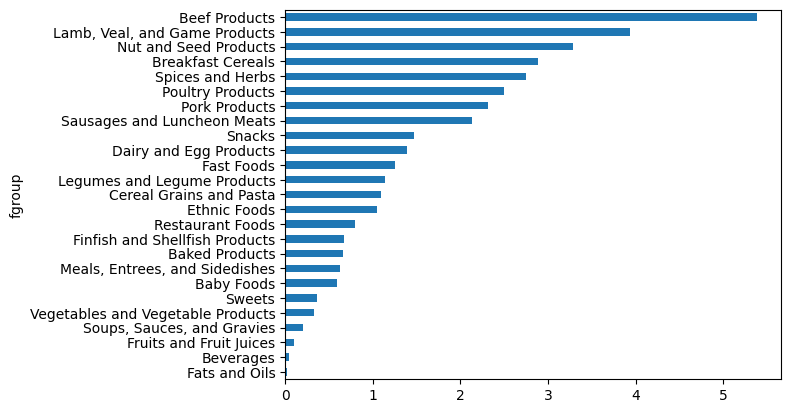

In [ ]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
result["Zinc, Zn"].sort_values().plot(kind="barh")

Nhận xét:

**Thịt bò** và **hải sản** là hai nhóm sản phẩm có kẽm nhiều nhất

 Tìm **“nhà vô địch”** của từng chất dinh dưỡng
Cuối cùng, ta tìm ra món ăn giàu nhất cho từng loại chất?

In [ ]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

def get_maximum(x):
  return x.loc[x.value.idxmax()]
max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50]

/tmp/ipython-input-1974872589.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]


Ví dụ, trong nhóm **Amino Acids** (axit amin), ta thấy:

In [ ]:
max_foods.loc["Amino Acids"]["food"]

,food
nutrient,
Alanine,"Gelatins, dry powder, unsweetened"
Arginine,"Seeds, sesame flour, low-fat"
Aspartic acid,Soy protein isolate
Cystine,"Seeds, cottonseed flour, low fat (glandless)"
Glutamic acid,Soy protein isolate
Glycine,"Gelatins, dry powder, unsweetened"
Histidine,"Whale, beluga, meat, dried (Alaska Native)"
Hydroxyproline,"KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA..."
Isoleucine,"Soy protein isolate, PROTEIN TECHNOLOGIES INTE..."


Mỗi chất dinh dưỡng đều có món ăn “vô địch” riêng, minh chứng rằng dữ liệu khổng lồ này có thể kể cho chúng ta những câu chuyện thú vị về thực phẩm.

## 5. 2012 Federal Election Commission Database

### Bối cảnh
Trong mỗi kỳ bầu cử tổng thống Hoa Kỳ, Ủy ban Bầu cử Liên bang (Federal Election Commission – FEC) công khai toàn bộ dữ liệu tài trợ cho các chiến dịch tranh cử.
Bộ dữ liệu này ghi lại chi tiết mọi khoản đóng góp, bao gồm:
* Tên người đóng góp

* Nghề nghiệp và nơi làm việc

* Địa chỉ thành phố, tiểu bang

* Số tiền đóng góp
* Ứng viên nhận tài trợ

### Nạp dữ liệu
Dữ liệu được lưu trong file CSV lớn tên là P00000001-ALL.csv (~150MB).

In [22]:
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory=False)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

Kết quả: Có hơn 1 triệu bản ghi (1001730) — nghĩa là hơn 1 triệu lần quyên góp cá nhân cho các ứng viên trong cuộc bầu cử tổng thống Mỹ năm 2012.

In [40]:
# Ta thử xem một mẫu cụ thể trong DataFrame
fec.iloc[123456]

,123456
cmte_id,C00431445
cand_id,P80003338
cand_nm,"Obama, Barack"
contbr_nm,"ELLMAN, IRA"
contbr_city,TEMPE
contbr_st,AZ
contbr_zip,852816719
contbr_employer,ARIZONA STATE UNIVERSITY
contbr_occupation,PROFESSOR
contb_receipt_amt,50.0


Nghĩa là:

  * Một giáo sư địa học ở bang ARIZONA đã
đóng góp $50 cho chiến dịch của Tổng thống Barack Obama vào ngày 1/12/2011.

### Xác định danh sách ứng viên

In [30]:
unique_cands = fec["cand_nm"].unique()
print("Có tổng cộng " + str(len(unique_cands)) +" ứng viên tham gia tranh cử.")
unique_cands

Có tổng cộng 13 ứng viên tham gia tranh cử.


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

Có tổng cộng 13 ứng viên trong cuộc đua năm 2012.

In [26]:
unique_cands[2]

'Obama, Barack'

### Bổ sung thông tin đảng phái

Ta tạo một dictionary ánh xạ để chỉ định ứng viên thuộc đảng phái nào:
* Democrat : Đảng Dân chủ
* Republican: Đảng Cộng hòa

In [31]:
parties = {"Bachmann, Michelle": "Republican",
"Cain, Herman": "Republican",
"Gingrich, Newt": "Republican",
"Huntsman, Jon": "Republican",
"Johnson, Gary Earl": "Republican",
"McCotter, Thaddeus G": "Republican",
"Obama, Barack": "Democrat",
"Paul, Ron": "Republican",
"Pawlenty, Timothy": "Republican",
"Perry, Rick": "Republican",
"Roemer, Charles E. 'Buddy' III": "Republican",
"Romney, Mitt": "Republican",
"Santorum, Rick": "Republican"}

Bây giờ, bằng cách sử dụng phép ánh xạ này và phương thức ánh xạ trên các đối tượng Series, ta có thể tính toán một mảng các đảng phái chính trị từ tên ứng cử viên:

In [35]:
fec["cand_nm"][123456:123465]


,cand_nm
123456,"Obama, Barack"
123457,"Obama, Barack"
123458,"Obama, Barack"
123459,"Obama, Barack"
123460,"Obama, Barack"
123461,"Obama, Barack"
123462,"Obama, Barack"
123463,"Obama, Barack"
123464,"Obama, Barack"


In [37]:
fec["cand_nm"][123456:123465].map(parties)

,cand_nm
123456,Democrat
123457,Democrat
123458,Democrat
123459,Democrat
123460,Democrat
123461,Democrat
123462,Democrat
123463,Democrat
123464,Democrat


Kết quả cho thấy phiếu bầu từ 123456 đến 123465 đều bầu cho ông **Barack Obama** đến từ **đảng Dân chủ**.

Thêm cột party (Đảng)

In [38]:
fec["party"] = fec["cand_nm"].map(parties)

In [39]:
fec["party"].value_counts()

,count
party,
Democrat,593746
Republican,407985


Như vậy, có gần 600.000 đóng góp cho Đảng Dân chủ, và ~400.000 cho Đảng Cộng hòa.


### Làm sạch dữ liệu

In [41]:
(fec["contb_receipt_amt"] > 0).value_counts()

,count
contb_receipt_amt,
True,991475
False,10256


In [42]:
fec = fec[fec["contb_receipt_amt"] > 0]

Nhận xét:
* Bộ dữ liệu gồm cả khoản đóng góp và hoàn tiền (refund).

* Lọc lại chỉ lấy các khoản đóng góp dương (> 0) để phân tích

Kết quả: có 991475 bản ghi hợp lệ

In [43]:
by_cand = fec.groupby('cand_nm')['contb_receipt_amt'].sum()
top_candidates = by_cand.sort_values(ascending=False)
print(top_candidates)

cand_nm
Obama, Barack                     1.358774e+08
Romney, Mitt                      8.833591e+07
Paul, Ron                         2.100962e+07
Perry, Rick                       2.030575e+07
Gingrich, Newt                    1.283277e+07
Santorum, Rick                    1.104316e+07
Cain, Herman                      7.101082e+06
Pawlenty, Timothy                 6.004819e+06
Huntsman, Jon                     3.330373e+06
Bachmann, Michelle                2.711439e+06
Johnson, Gary Earl                5.669616e+05
Roemer, Charles E. 'Buddy' III    3.730099e+05
McCotter, Thaddeus G              3.903000e+04
Name: contb_receipt_amt, dtype: float64


Kết quả cho thấy **Obama, Barack** và **Romney, Mitt** là 2 ứng cử viên chính trong kì bầu cử 2012.

--> Cho nên ta chỉ lấy dữ liệu quyên góp cho Obama và Romney — hai nhân vật chủ chốt 2012.

In [57]:
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]
fec_mrbo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694282 entries, 411 to 701385
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cmte_id            694282 non-null  object 
 1   cand_id            694282 non-null  object 
 2   cand_nm            694282 non-null  object 
 3   contbr_nm          694282 non-null  object 
 4   contbr_city        694275 non-null  object 
 5   contbr_st          694278 non-null  object 
 6   contbr_zip         694234 non-null  object 
 7   contbr_employer    693607 non-null  object 
 8   contbr_occupation  693524 non-null  object 
 9   contb_receipt_amt  694282 non-null  float64
 10  contb_receipt_dt   694282 non-null  object 
 11  receipt_desc       2345 non-null    object 
 12  memo_cd            87387 non-null   object 
 13  memo_text          90672 non-null   object 
 14  form_tp            694282 non-null  object 
 15  file_num           694282 non-null  int64  
 16  party

Dữ liệu hợp lệ còn 694282 dòng.

### Thống kê quyên góp theo nghề nghiệp và nhà tuyển dụng (Donation Statistics by Occupation and Employer)

#### Thống kê số lượng nghề nghiệp

In [45]:
fec["contbr_occupation"].value_counts()[:10]

,count
contbr_occupation,
RETIRED,233990
INFORMATION REQUESTED,35107
ATTORNEY,34286
HOMEMAKER,29931
PHYSICIAN,23432
INFORMATION REQUESTED PER BEST EFFORTS,21138
ENGINEER,14334
TEACHER,13990
CONSULTANT,13273


→ Nghề **“RETIRED”** và **“ATTORNEY”** đóng góp nhiều nhất.

#### Chuẩn hóa dữ liệu nghề nghiệp và nhà tuyển dụng

In [49]:
# Chuẩn hóa nghề nghiệp
occ_mapping = {
"INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
"INFORMATION REQUESTED" : "NOT PROVIDED",
"INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
"C.E.O.": "CEO"
}

def get_occ(x):
  return occ_mapping.get(x, x)

fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

→ Dữ liệu sạch, giảm sai lệch khi thống kê.

In [51]:
# Chuẩn hóa nhà tuyển dụng
emp_mapping = {
"INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
"INFORMATION REQUESTED" : "NOT PROVIDED",
"SELF" : "SELF-EMPLOYED",
"SELF EMPLOYED" : "SELF-EMPLOYED",
}

def get_emp(x):
  return emp_mapping.get(x, x)

fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)

→ Gom các biến thể (“SELF”, “SELF EMPLOYED”) về cùng dạng chuẩn “SELF-EMPLOYED”.

#### Phân tích tổng đóng góp theo nghề & đảng

In [52]:
by_occupation = fec.pivot_table("contb_receipt_amt",
                                index="contbr_occupation",
                                columns="party", aggfunc="sum")
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


Từ kết quả cho thấy các nghề giàu ảnh hưởng gồm: RETIRED, ATTORNEY, HOMEMAKER.

<Axes: ylabel='contbr_occupation'>

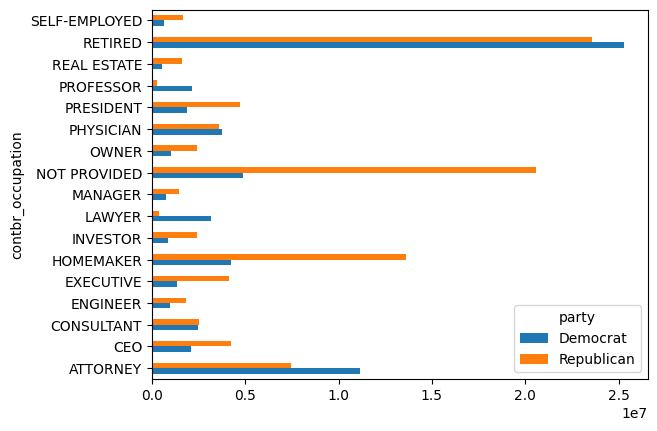

In [53]:
over_2mm.plot(kind="barh")

Biểu đồ giúp so sánh rõ hơn giữa Democrat vs Republican.

#### Top nghề nghiệp và công ty quyên góp cho từng ứng cử viên

In [54]:
def get_top_amounts(group, key, n=5):
  totals = group.groupby(key)["contb_receipt_amt"].sum()
  return totals.nlargest(n)
grouped = fec_mrbo.groupby("cand_nm")
grouped.apply(get_top_amounts, "contbr_occupation", n=7)

/tmp/ipython-input-3128839052.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_occupation", n=7)


cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                                     1968386.11
Name: contb_receipt_amt, dtype: float64

In [55]:
grouped.apply(get_top_amounts, "contbr_employer", n=10)

/tmp/ipython-input-4213707751.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_employer", n=10)


cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                              7409860.98
               STUDENT                                     496490.94
               CREDIT SUISSE                               281150.00
               MORGAN STANLEY                              267266.00
               GOLDMAN SACH & CO.                          238250.00
               BARCLAYS CAPITAL                            162750.00
               H.I.G. CAPITAL                              139500.00
Name: contb_receipt_amt, dtype: float64

| **Ứng cử viên** | **Top nghề nghiệp quyên góp**                  | **Top nhà tuyển dụng**                               |
|------------------|------------------------------------------------|------------------------------------------------------|
| **Obama**        | RETIRED, ATTORNEY, PHYSICIAN, LAWYER          | RETIRED, SELF-EMPLOYED, MICROSOFT                    |
| **Romney**       | HOMEMAKER, EXECUTIVE, CEO                      | MORGAN STANLEY, GOLDMAN SACHS, BARCLAYS CAPITAL      |


### Phân tích số tiền quyên góp (Bucketing Donation Amounts)

Sử dụng hàm cắt để phân chia số tiền đóng góp thành các nhóm theo quy mô đóng góp

In [60]:
import numpy as np
bins = np.array([0, 1, 10, 100, 1000, 10000, 100_000, 1_000_000, 10_000_000])
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)
labels

,contb_receipt_amt
411,"(10, 100]"
412,"(100, 1000]"
413,"(100, 1000]"
414,"(10, 100]"
415,"(10, 100]"
...,...
701381,"(10, 100]"
701382,"(100, 1000]"
701383,"(1, 10]"
701384,"(10, 100]"


Phân bố số lượng đóng góp

In [61]:
grouped = fec_mrbo.groupby(["cand_nm", labels])
grouped.size().unstack(level=0)

/tmp/ipython-input-3276222007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = fec_mrbo.groupby(["cand_nm", labels])


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


Nhận xét:
* Obama nhận nhiều khoản nhỏ (≤ $100) hơn hẳn Romney.

* Romney có tỷ lệ đóng góp lớn (≥ $1000) cao hơn.

Chuẩn hóa tỷ lệ đóng góp theo quy mô

In [62]:
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"), axis="index")
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


Bây giờ ta sẽ trự quan nó bằng biểu đồ cột.

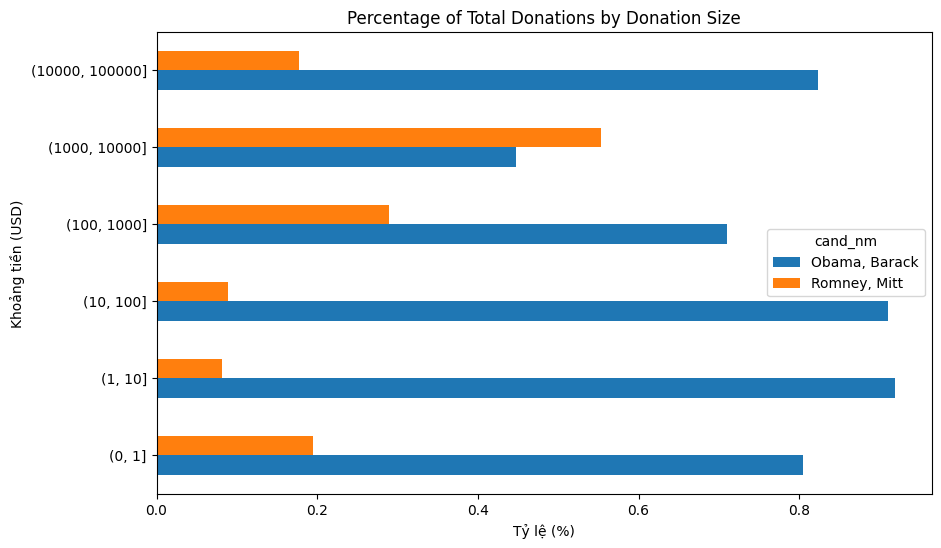

In [64]:
import matplotlib.pyplot as plt

normed_sums[:-2].plot(kind="barh", figsize=(10,6))
plt.title("Percentage of Total Donations by Donation Size")
plt.xlabel("Tỷ lệ (%)")
plt.ylabel("Khoảng tiền (USD)")
plt.show()


* Obama thống trị hoàn toàn ở các nhóm quyên góp nhỏ, thể hiện chiến dịch huy động quần chúng mạnh mẽ.

* Romney lại nổi bật trong các khoản lớn, gợi ý mạng lưới ủng hộ viên giàu có hoặc doanh nghiệp.

### Thống kê quyên góp theo bang (Donation Statistics by State)

Tổng hợp dữ liệu theo ứng viên và tiểu bang

In [65]:
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)
totals = totals[totals.sum(axis="columns") > 100000]
totals.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


Tính tỷ lệ phần trăm quyên góp theo bang

In [66]:
percent = totals.div(totals.sum(axis="columns"), axis="index")
percent.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


Nhận xét:

* Obama nhận được đa số quyên góp ở các bang đông dân và có xu hướng nghiêng về Đảng Dân chủ như
🇨🇦 California, 🇩🇪 Delaware, 🇩🇨 Washington D.C.

* Romney mạnh hơn ở các bang bảo thủ, ví dụ như 🇦🇿 Arizona, 🇫🇱 Florida, 🇨🇹 Connecticut.

* Một số bang như 🇦🇱 Alabama có tỷ lệ gần cân bằng giữa hai bên.

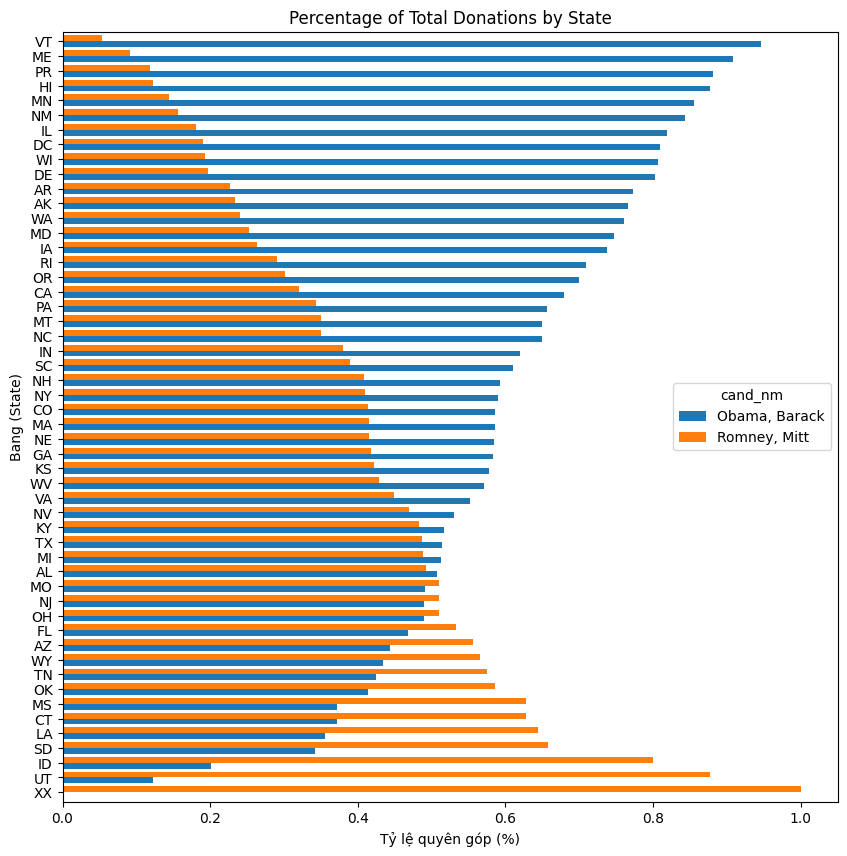

In [67]:
import matplotlib.pyplot as plt

percent.sort_values(by="Obama, Barack", ascending=True).plot(
    kind="barh", figsize=(10, 10), width=0.8
)
plt.title("Percentage of Total Donations by State")
plt.xlabel("Tỷ lệ quyên góp (%)")
plt.ylabel("Bang (State)")
plt.show()


Hình biểu đồ giúp dễ dàng thấy được:

* Bang nào ủng hộ Obama mạnh hơn (màu xanh).

* Bang nào có xu hướng ủng hộ Romney (màu cam).

## 6. Coclusion